In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('../Ficheros/attack_limpieza2.csv', index_col = 0)

Por lo tanto, en este ejercicio tendremos que limpiar los outliers. 
1- ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [2]:
df.drop(["Unnamed: 0"], axis = 1, inplace=True)

In [3]:
df['nuevas_edades'].unique()

array([nan, 14., 19., 20., 15., 21., 27., 36., 25.,  6., 16., 50., 13.,
       57., 11., 48., 18., 52., 12., 32., 10., 34., 30., 60., 33., 29.,
       54., 41., 37., 56., 69., 38., 55., 35., 46., 45., 40., 28., 24.,
       26., 49., 22.,  7., 31., 17., 42.,  3.,  8., 82., 73., 68., 51.,
       39., 58., 47., 61., 65., 66., 43.,  9., 72., 59., 64., 23., 71.,
       44., 62., 63., 70., 53., 77., 74.,  5., 86., 84., 75., 87., 67.,
        1.,  2., 81., 78.])

In [4]:
df.sample(10)

,case_number,year,country,activity,age,species_,date,mes,fatal_,sex2,nuevas_edades
5717,1899.12.18,1899,australia,Fell into the water,NAN,NAN,18-Dec-1899,Dec,n,M,NaN
4710,1948.02.13,1948,usa,"C47 aircraft carrying 5,000 lbs of ice ditched...",NAN,NAN,13-Feb-1948,Feb,y,M,NaN
3043,1984.09.22.a,1984,usa,Surfing,16,Unspecified,22-Sep-1984,Sep,n,M,16.0
885,2012.12.02,2012,australia,Spearfishing,31,Tiger,02-Dec-2012,Dec,n,M,31.0
2138,2001.02.11,2001,malaysia,Unknown,NAN,Unspecified,11-Feb-2001,Feb,NAN,F,NaN
2316,1998.11.05,1998,usa,Surfing,32,White,05-Nov-1998,Nov,n,M,32.0
1108,2011.02.28.R,2011,australia,Fishing,36,Bull,Reported 28-Feb-2011,Feb,n,M,36.0
3868,1964.01.11,1964,usa,Spearfishing / Scuba diving (at surface),21,White,11-Jan-1964,Jan,n,M,21.0
1907,2003.09.14.a,2003,usa,Swimming,8 or 10,Unspecified,14-Sep-2003,Sep,NAN,F,8.0
955,2012.06.02.a,2012,usa,Boogie Boarding,25,NAN,02-Jun-2012,Jun,n,M,25.0


In [5]:
df["year"].unique()

array([1800, 1797, 1792, 1791, 1788, 1787, 1786, 1785, 1784, 1783, 1780,
       1779, 1776, 1771, 1767, 1764, 1758, 1753, 1751, 1749, 1755, 1748,
       1742, 1738, 1733, 1723, 1721, 1703, 1700, 1642, 1638, 1637, 1617,
       1595, 1580, 1555, 1554, 1543,  500,   77,    5,    0, 2018, 2017,
       2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995,
       1984, 1994, 1993, 1992, 1991, 1990, 1989, 1969, 1988, 1987, 1986,
       1985, 1983, 1982, 1981, 1980, 1979, 1978, 1977, 1976, 1975, 1974,
       1973, 1972, 1971, 1970, 1968, 1967, 1966, 1965, 1964, 1963, 1962,
       1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951,
       1950, 1949, 1948, 1848, 1947, 1946, 1945, 1944, 1943, 1942, 1941,
       1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930,
       1929, 1928, 1927, 1926, 1925, 1924, 1923, 1922, 1921, 1920, 1919,
       1918, 1917, 1916, 1915, 1914, 1913, 1912, 19

In [6]:
# En la columna años es necesario trabajar los outliers porque todo lo que esté por debajo de 1700 son datos extraños, año 0, año 5... no podía haber registros
# En la columna nuevas_edades también vamos a estudiarlo porque no sabemos si bebés o tercera edad pueden tener sentido

2- Identifica visualmente los outliers


In [7]:
df_numericas = df.select_dtypes(include=np.number)

In [8]:
df_numericas

,year,nuevas_edades
0,1800,NaN
1,1797,NaN
2,1792,NaN
3,1791,NaN
4,1788,NaN
...,...,...
6279,1804,NaN
6280,1803,NaN
6281,1803,NaN
6282,1802,NaN


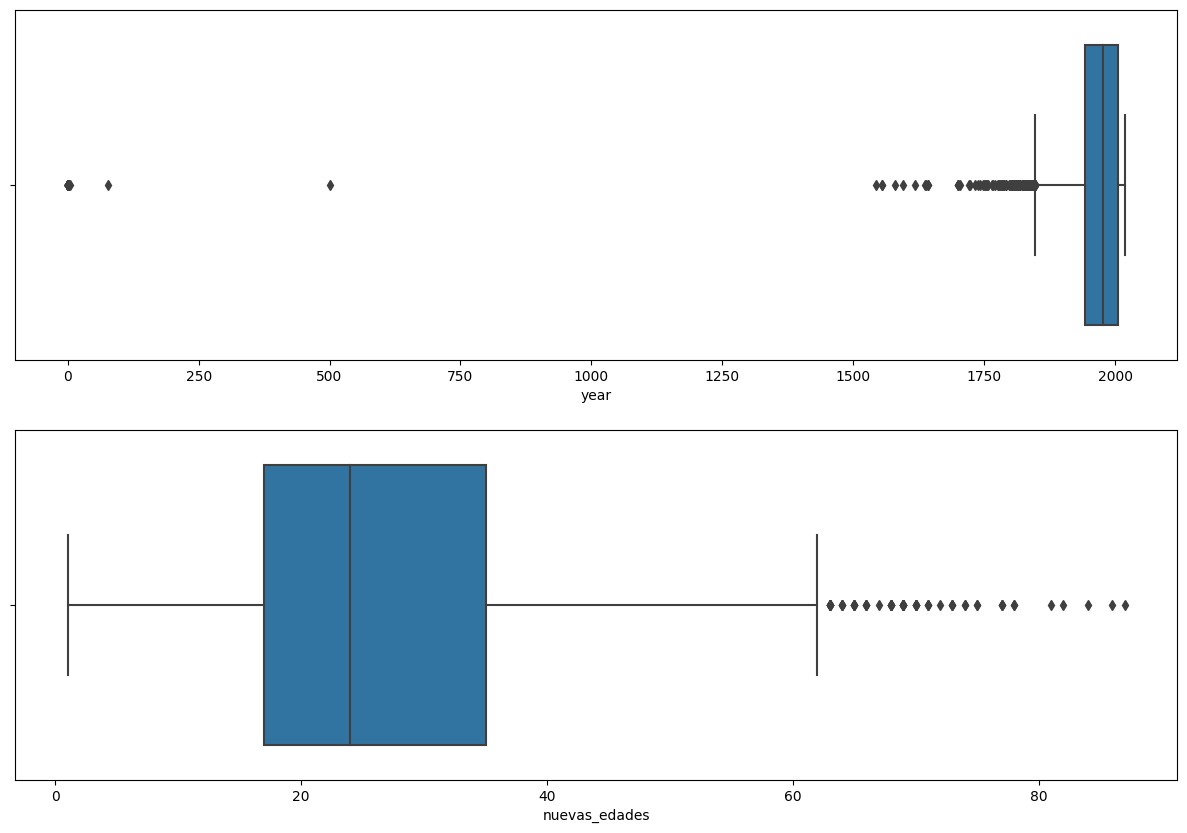

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

3- Identifica sobre el dataframe las filas que son outliers

In [10]:
# cálculo del Q1 para columna year
Q1y = np.percentile(df['year'], 25)
Q1y

1942.0

In [11]:
# cálculo del Q3 para columna year
Q3y = np.percentile(df['year'], 75)
Q3y

2005.0

In [12]:
#calculemos el IQR 

IQRy = Q3y - Q1y
IQRy

63.0

In [13]:
# multiplicamos el IQR por 1.5

outlier_step_y= 1.5 * IQRy
outlier_step_y

94.5

In [14]:
outliers_data = df[(df['year'] < Q1y - outlier_step_y) | (df["year"] > Q3y + outlier_step_y)]
outliers_data.sample(20)

,case_number,year,country,activity,age,species_,date,mes,fatal_,sex2,nuevas_edades
137,ND.0034,0,pacific ocean,NAN,NAN,NAN,1940-1946,NAN,y,M,NaN
13,1776.00.00.b,1776,greenland,NAN,NAN,White,1776,NAN,y,NAN,NaN
138,ND.0033,0,burma,Carrying a supposedly dead shark by its mouth,NAN,NAN,Before 1905,NAN,n,M,NaN
6229,1837.07.00,1837,usa,Bathing,NAN,NAN,Jul-1837,Jul,n,M,NaN
6217,1842.00.00.a,1842,australia,"Unknown, but it was said to be the ""First know...",NAN,NAN,1842,NAN,n,M,NaN
27,1721.06.00,1721,italy,Swimming,NAN,White,June 1721,NAN,y,M,NaN
65,ND-0129,0,spain,Skin diving,NAN,NAN,Before 2012,NAN,n,NAN,NaN
87,ND.0095,0,solomon islands,Diving,NAN,NAN,Before Feb-1998,Feb,n,M,NaN
56,ND-1940,0,papua new guinea,Swimming to canoe,NAN,NAN,Before 1930,NAN,y,M,NaN
6210,1844.07.20.,1844,namibia,Boat capsized,NAN,NAN,20-Jul-1844,Jul,y,M,NaN


In [15]:
# cálculo del Q1 para columna nuevas edades

Q1e = np.nanpercentile(df['nuevas_edades'], 25)
Q1e

17.0

In [16]:
# cálculo del Q3 para columna nuevas edades
Q3e = np.nanpercentile(df['nuevas_edades'], 75)
Q3e

35.0

In [17]:
#calculemos el IQR 

IQRe = Q3e - Q1e
IQRe

18.0

In [18]:
# multiplicamos el IQR por 1.5

outlier_step_e= 1.5 * IQRe
outlier_step_e

27.0

In [19]:
outliers_data_e = df[(df['nuevas_edades'] < Q1e - outlier_step_e) | (df["nuevas_edades"] > Q3e + outlier_step_e)]
outliers_data_e.head()

,case_number,year,country,activity,age,species_,date,mes,fatal_,sex2,nuevas_edades
207,2018.03.09.b,2018,australia,Swimming,69,Unspecified,9-Mar-2018,Mar,n,M,69.0
270,2017.08.23,2017,usa,SUP,69,White,23-Aug-2017,Aug,n,M,69.0
300,2017.06.17,2017,spain,Swimming,82,NAN,17-Jun-2017,Jun,n,M,82.0
311,2017.05.27,2017,australia,Fishing,73,NAN,27-May-2017,May,n,M,73.0
329,2017.04.12.a,2017,south africa,Scuba Diving,68,Unspecified,12-Apr-2017,Apr,NAN,M,68.0


In [20]:
df['nuevas_edades'].unique()

array([nan, 14., 19., 20., 15., 21., 27., 36., 25.,  6., 16., 50., 13.,
       57., 11., 48., 18., 52., 12., 32., 10., 34., 30., 60., 33., 29.,
       54., 41., 37., 56., 69., 38., 55., 35., 46., 45., 40., 28., 24.,
       26., 49., 22.,  7., 31., 17., 42.,  3.,  8., 82., 73., 68., 51.,
       39., 58., 47., 61., 65., 66., 43.,  9., 72., 59., 64., 23., 71.,
       44., 62., 63., 70., 53., 77., 74.,  5., 86., 84., 75., 87., 67.,
        1.,  2., 81., 78.])

4- Reemplaza los outliers por el estadístico más correcto.

In [21]:
# en la columna year vamos a reemplazar los outliers por la mediana

In [22]:
# En el paso anterior, probamos a hacer el código fuera de la función, paso a paso y ahora cogimos la función de los apuntes

In [23]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        
    
    return dicc_indices

In [24]:
ind = detectar_outliers(df_numericas, df)
ind

{'year': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  1

In [25]:
df['nuevas_edades'].unique()

array([nan, 14., 19., 20., 15., 21., 27., 36., 25.,  6., 16., 50., 13.,
       57., 11., 48., 18., 52., 12., 32., 10., 34., 30., 60., 33., 29.,
       54., 41., 37., 56., 69., 38., 55., 35., 46., 45., 40., 28., 24.,
       26., 49., 22.,  7., 31., 17., 42.,  3.,  8., 82., 73., 68., 51.,
       39., 58., 47., 61., 65., 66., 43.,  9., 72., 59., 64., 23., 71.,
       44., 62., 63., 70., 53., 77., 74.,  5., 86., 84., 75., 87., 67.,
        1.,  2., 81., 78.])

In [26]:
for v in ind["year"]:
   mediana = df["year"].median()
   df['year'].replace(df.iloc[v]["year"],mediana, inplace=True)


In [27]:
mediana

1977.0

In [28]:
np.set_printoptions(suppress=True)

- Hemos decidido trabajar con los outliers por encima de Q3+IQR dado que el boxplot nos indica que solo tenemos outliers en esa franja de edades.

In [30]:
outliers_data_mayores = df[(df["nuevas_edades"] > Q3e + outlier_step_e)]
outliers_data_mayores.head()

,case_number,year,country,activity,age,species_,date,mes,fatal_,sex2,nuevas_edades
207,2018.03.09.b,2018,australia,Swimming,69,Unspecified,9-Mar-2018,Mar,n,M,69.0
270,2017.08.23,2017,usa,SUP,69,White,23-Aug-2017,Aug,n,M,69.0
300,2017.06.17,2017,spain,Swimming,82,NAN,17-Jun-2017,Jun,n,M,82.0
311,2017.05.27,2017,australia,Fishing,73,NAN,27-May-2017,May,n,M,73.0
329,2017.04.12.a,2017,south africa,Scuba Diving,68,Unspecified,12-Apr-2017,Apr,NAN,M,68.0


In [36]:
media_mayores=outliers_data_mayores['nuevas_edades'].mean().round(2)
media_mayores


69.76

In [37]:
for v in ind["nuevas_edades"]:
   df['nuevas_edades'].replace(df.iloc[v]["nuevas_edades"],media_mayores, inplace=True)


In [39]:
df['nuevas_edades'].unique()

array([  nan, 14.  , 19.  , 20.  , 15.  , 21.  , 27.  , 36.  , 25.  ,
        6.  , 16.  , 50.  , 13.  , 57.  , 11.  , 48.  , 18.  , 52.  ,
       12.  , 32.  , 10.  , 34.  , 30.  , 60.  , 33.  , 29.  , 54.  ,
       41.  , 37.  , 56.  , 69.76, 38.  , 55.  , 35.  , 46.  , 45.  ,
       40.  , 28.  , 24.  , 26.  , 49.  , 22.  ,  7.  , 31.  , 17.  ,
       42.  ,  3.  ,  8.  , 51.  , 39.  , 58.  , 47.  , 61.  , 43.  ,
        9.  , 59.  , 23.  , 44.  , 62.  , 53.  ,  5.  ,  1.  ,  2.  ])

5- Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza.

In [40]:
df.to_csv("../Ficheros/attack_limpieza3.csv")